# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software

Importação dos módulos necessários para a análise dos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Definição de funções auxiliares para peparar os conjuntos de dados relativos a cada algoritmo

In [2]:
def algorithm_dataset(raw_data, algorithm_id, sorted_by="event", zero_values=False):
    data = raw_data.loc[[algorithm_id]]
    data = data.sort_values(by=sorted_by)
    if not zero_values:
        data = data[data.hypervolume != 0]
    return data

def comparison_dataset(ds):
    return ds.groupby(["algorithm","event"], as_index=False)["hypervolume"].mean()

def max_event(ds):
    return ds["event"].max()

Leitura dos dados a partir do arquivo de métricas dos resultados e preparação dos conjuntos de dados relativos a cada algoritmo

In [3]:
column_labels = ["algorithm", "instance", "execution", "event", "hypervolume"] 
data = pd.read_csv("../hypervolume/metrics.csv", 
                   delimiter=" ", 
                   header=None,     
                   names=column_labels,
                   index_col=column_labels[0])

ds_nsgaii = algorithm_dataset(data, "NSGAII", zero_values=True)
ds_nsgaii_dyn = algorithm_dataset(data, "NSGAIIDYNAMIC", zero_values=True)
ds_smpso = algorithm_dataset(data, "SMPSO", zero_values=True)
ds_smpso_dyn = algorithm_dataset(data, "SMPSODYNAMIC", zero_values=True)

In [4]:
datasets = {
    'nsgaii': comparison_dataset(ds_nsgaii),
    'nsgaii_dyn': comparison_dataset(ds_nsgaii_dyn),
    'smpso': comparison_dataset(ds_smpso),
    'smpso_dyn': comparison_dataset(ds_smpso_dyn)
}

min_event = min([max_event(ds) for ds in datasets.values()])

for k in datasets.keys():
    datasets[k] = datasets[k][:min_event+1]


In [5]:
datasets["nsgaii"].tail()

,event,hypervolume
147,147,0.527623
148,148,0.361428
149,149,0.430356
150,150,0.000000
151,151,0.229169


In [6]:
datasets["nsgaii_dyn"].tail()

,event,hypervolume
147,147,0.0
148,148,0.0
149,149,0.0
150,150,0.0
151,151,0.0


In [7]:
datasets["smpso"].tail()

,event,hypervolume
147,147,1.060778
148,148,1.320480
149,149,0.973435
150,150,0.133935
151,151,0.000000


In [8]:
datasets["smpso_dyn"].tail()

,event,hypervolume
147,147,1.088897
148,148,1.208524
149,149,1.227384
150,150,1.178465
151,151,1.207194


Geração dos gráficos comparativos

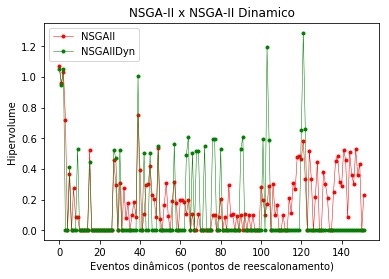

In [9]:
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

plt.title("NSGA-II x NSGA-II Dinamico")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["nsgaii"].event, datasets["nsgaii"].hypervolume, "-ro", markersize=3, lw=.5, label="NSGAII")
plt.plot(datasets["nsgaii_dyn"].event, datasets["nsgaii_dyn"].hypervolume, "-go", markersize=3, lw=.5, label="NSGAIIDyn")
plt.legend()
plt.show()

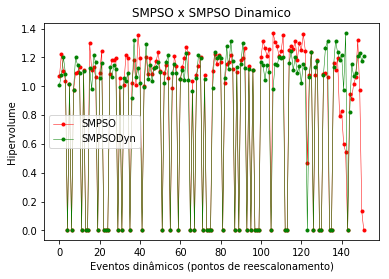

In [10]:
plt.title("SMPSO x SMPSO Dinamico")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["smpso"].event, datasets["smpso"].hypervolume, "-ro", markersize=3, lw=.5, label="SMPSO")
plt.plot(datasets["smpso_dyn"].event, datasets["smpso_dyn"].hypervolume, "-go", markersize=3, lw=.5, label="SMPSODyn")
plt.legend()
plt.show()

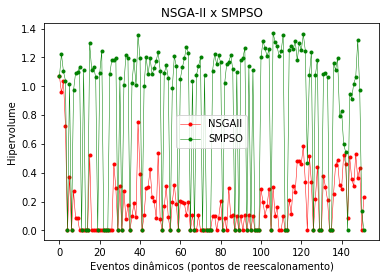

In [11]:
plt.title("NSGA-II x SMPSO")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["nsgaii"].event, datasets["nsgaii"].hypervolume, "-ro", markersize=3, lw=.5, label="NSGAII")
plt.plot(datasets["smpso"].event, datasets["smpso"].hypervolume, "-go", markersize=3, lw=.5, label="SMPSO")
plt.legend()
plt.show()

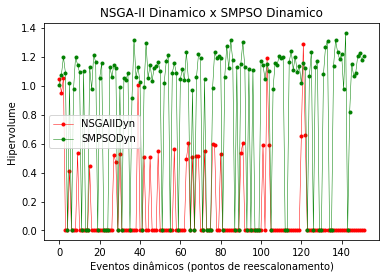

In [12]:
plt.title("NSGA-II Dinamico x SMPSO Dinamico")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(datasets["nsgaii_dyn"].event, datasets["nsgaii_dyn"].hypervolume, "-ro", markersize=3, lw=.5, label="NSGAIIDyn")
plt.plot(datasets["smpso_dyn"].event, datasets["smpso_dyn"].hypervolume, "-go", markersize=3, lw=.5, label="SMPSODyn")
plt.legend()
plt.show()